In [1]:
# supress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np

In [3]:
sharing=pd.read_csv('day.csv')

In [4]:
sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Identifying the continous and categorical variables

Columns to be dropped:
    1. instant- doesnot give much insight
    2. dteday - yr,mnth
    3. casual - adding them we get the cnt
    4. registered - adding them we get the cnt
    5. temp- hight corelatted with a temp
Continous Variable:
    1.atemp     2.hum   3.windspeed 


Categorical Variables:
    1. season    2.yr    3.mnth    4.holiday    5.weekday    6.workingday    7.weathersit

Creating dummy variables for the categorical variables:
    

In [5]:
sharing["season"] = sharing["season"].map({1:"spring", 2:"summer", 3:"fall", 4:"winter"})

In [6]:
sharing["season"].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [7]:
sharing["yr"] = sharing["yr"].map({0: 2018, 1:2019})
sharing["yr"].value_counts()

2019    365
2018    365
Name: yr, dtype: int64

In [8]:
sharing["mnth"].dtypes

dtype('int64')

In [9]:
sharing["mnth"] = sharing["mnth"].astype(object)

In [10]:
sharing["mnth"] = sharing["mnth"].map({1:"Jan", 2:"Feb", 3:"Mar", 4:"Apr", 5:"May", 6:"Jun", 7:"July", 8:"Aug", 9:"Sept", 10:"Oct", 11:"Nov", 12:"Dec"})
sharing["mnth"].value_counts()

Oct     62
Dec     62
Mar     62
Jan     62
Aug     62
May     62
July    62
Apr     60
Nov     60
Jun     60
Sept    60
Feb     56
Name: mnth, dtype: int64

In [11]:
sharing["holiday"] = sharing["holiday"].astype(object)
sharing["holiday"] = sharing["holiday"].map({1:"holiday",0:"NotHoliday"})
sharing["holiday"].value_counts()

NotHoliday    709
holiday        21
Name: holiday, dtype: int64

In [12]:
sharing["weekday"].dtype
sharing["weekday"] = sharing["weekday"].astype(object)
sharing["weekday"] = sharing["weekday"].map({0:"Sun", 1:"Mon", 2:"Tues", 3:"Wed", 4:"Thurs", 5:"Fri", 6:"Sat"})
sharing["weekday"].value_counts()

Sun      105
Mon      105
Sat      105
Fri      104
Tues     104
Thurs    104
Wed      103
Name: weekday, dtype: int64

In [13]:
sharing["workingday"].dtype
sharing["workingday"] = sharing["workingday"].astype(object)
sharing["workingday"] = sharing["workingday"].map({0:"non_working", 1:"working"})
sharing["workingday"].value_counts()

working        499
non_working    231
Name: workingday, dtype: int64

In [14]:
sharing["weathersit"].dtype
sharing["weathersit"] = sharing["weathersit"].astype(object)
sharing["weathersit"] = sharing["weathersit"].map({1:"Clear", 2:"Mist", 3:"Light_snow",4:"Heavy_Rain"})
sharing["weathersit"].value_counts()


Clear         463
Mist          246
Light_snow     21
Name: weathersit, dtype: int64

### Visualising the data using seaborn lib

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

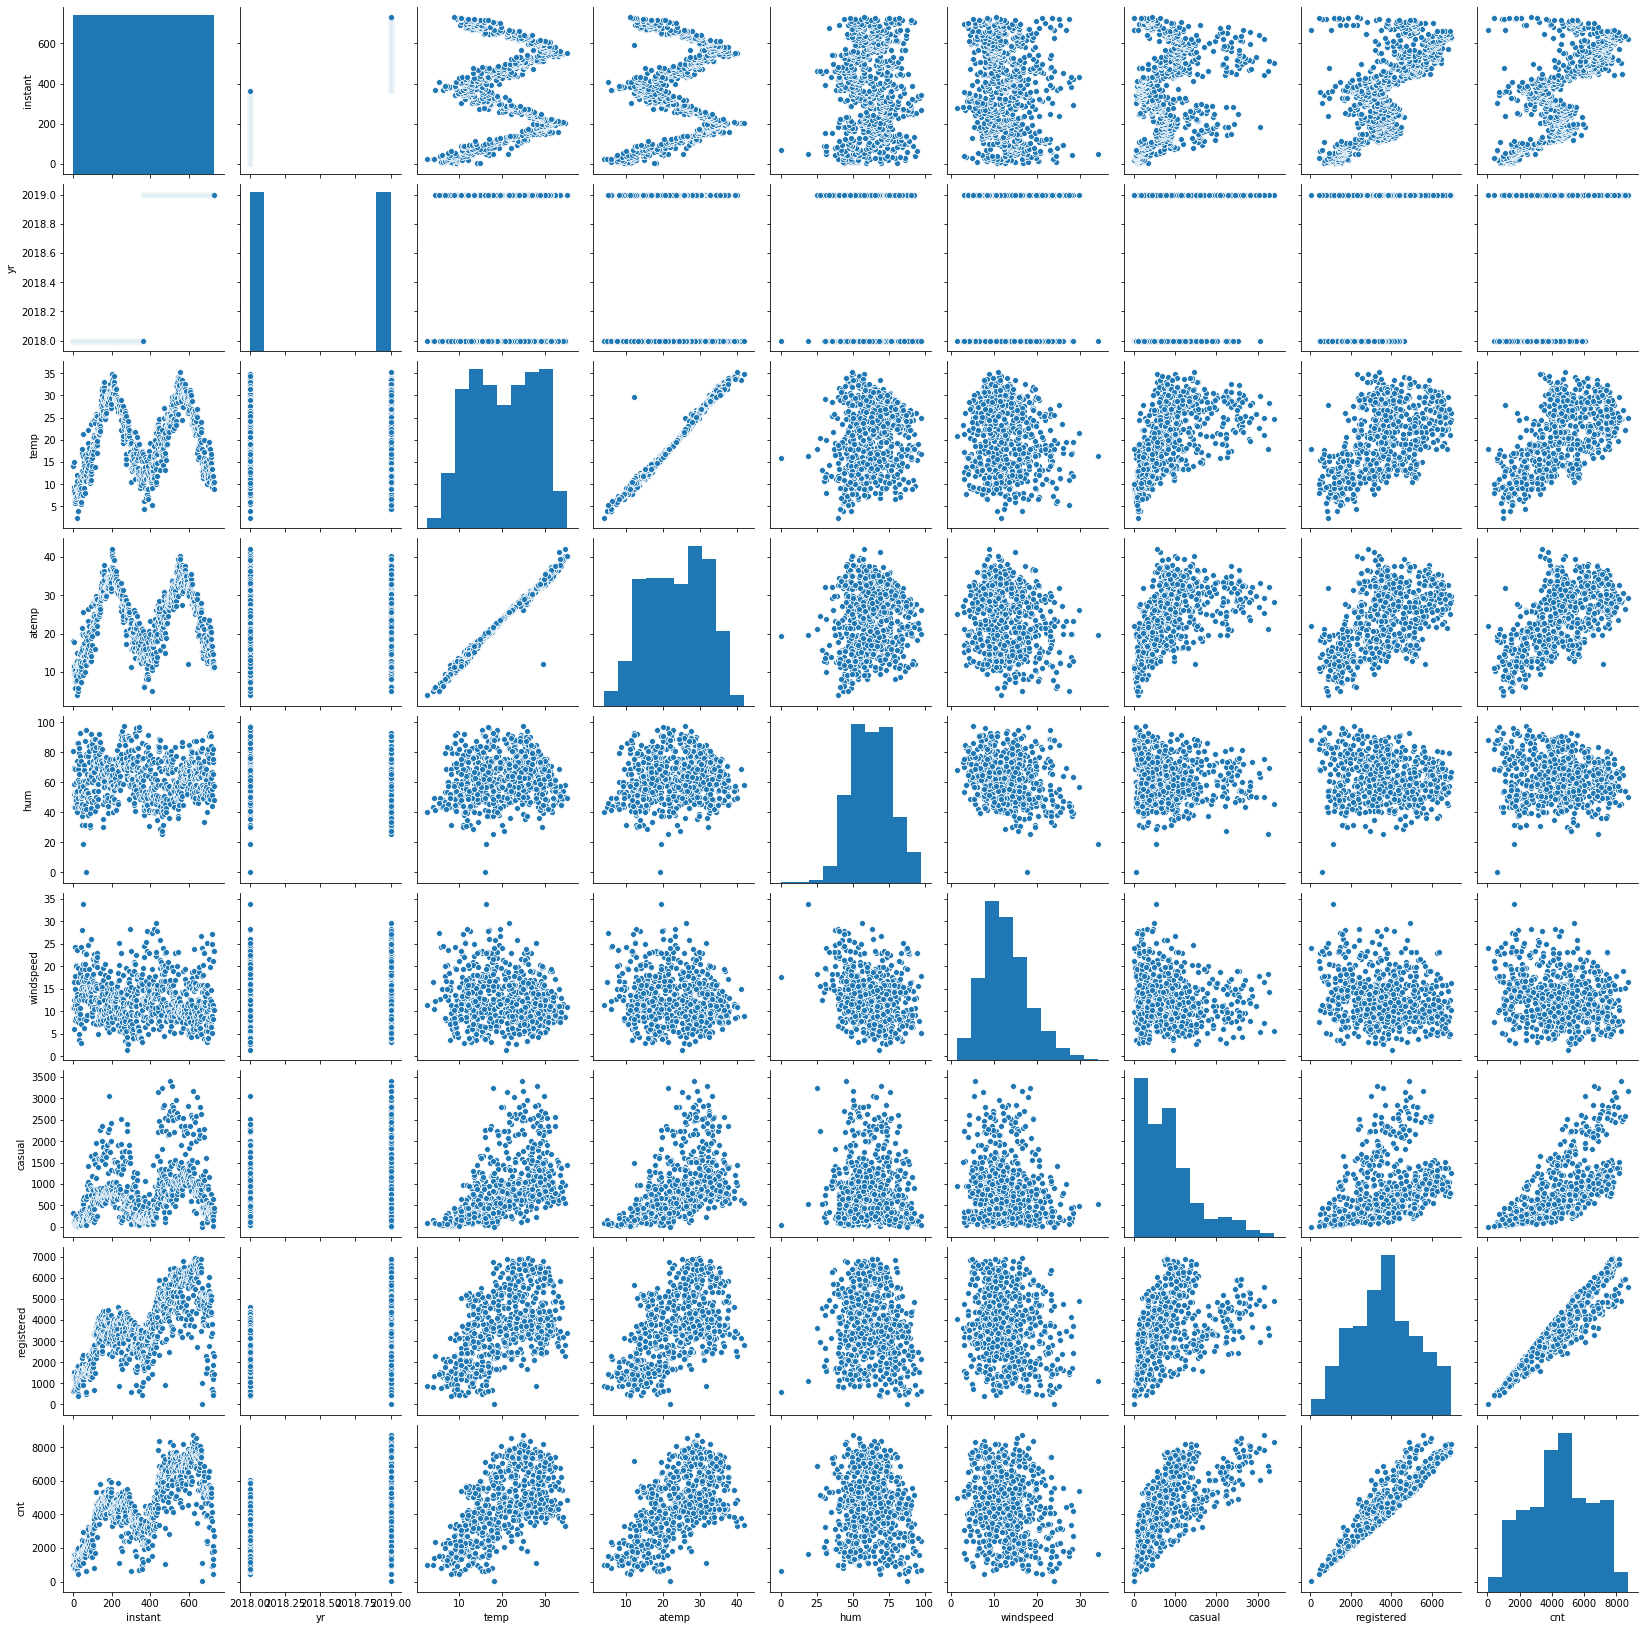

In [16]:
sns.pairplot(sharing)
plt.show()

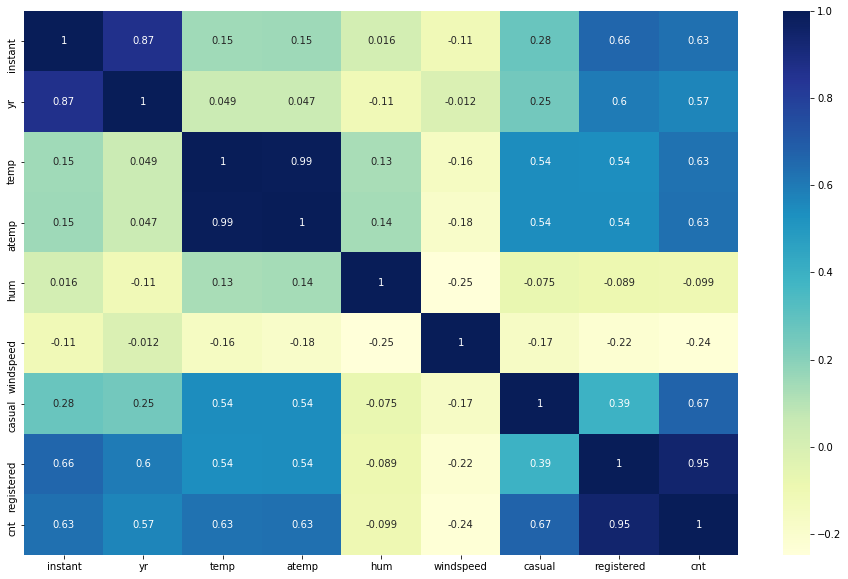

In [17]:
plt.figure(figsize=(16,10))
sns.heatmap(sharing.corr(),annot = True, cmap = "YlGnBu")
plt.show()


### We can see there are no missing rowsor data in the dataframe

In [18]:
sharing.count()

instant       730
dteday        730
season        730
yr            730
mnth          730
holiday       730
weekday       730
workingday    730
weathersit    730
temp          730
atemp         730
hum           730
windspeed     730
casual        730
registered    730
cnt           730
dtype: int64

In [19]:
sharing.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### After converting the categorical vars from int to object, lets drop the columns that are highly correlated.

In [20]:
to_drop = ['instant','dteday','casual','registered','temp']
sharing.drop(to_drop, axis=1,inplace = True)

In [21]:
sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,2018,Jan,NotHoliday,Sat,non_working,Mist,18.18125,80.5833,10.749882,985
1,spring,2018,Jan,NotHoliday,Sun,non_working,Mist,17.68695,69.6087,16.652113,801
2,spring,2018,Jan,NotHoliday,Mon,working,Clear,9.47025,43.7273,16.636703,1349
3,spring,2018,Jan,NotHoliday,Tues,working,Clear,10.60610,59.0435,10.739832,1562
4,spring,2018,Jan,NotHoliday,Wed,working,Clear,11.46350,43.6957,12.522300,1600


### Creating dummy variables for the following categorical variables
    1. season    2.yr    3.mnth    4.holiday    5.weekday    6.workingday    7.weathersit

In [22]:
seas = pd.get_dummies(sharing["season"], drop_first=True)
sharing = pd.concat([sharing,seas], axis = 1)
sharing.drop(['season'], axis = 1, inplace = True)

In [23]:
y = pd.get_dummies(sharing["yr"], drop_first=True)
sharing = pd.concat([sharing,y], axis = 1)
sharing.drop(['yr'], axis = 1, inplace = True)

In [24]:
mn = pd.get_dummies(sharing["mnth"], drop_first=True)
sharing = pd.concat([sharing,mn], axis = 1)
sharing.drop(['mnth'], axis = 1, inplace = True)

In [25]:
hol = pd.get_dummies(sharing["holiday"], drop_first=True)
sharing = pd.concat([sharing,hol], axis = 1)
sharing.drop(['holiday'], axis = 1, inplace = True)

In [26]:
wkd = pd.get_dummies(sharing["weekday"], drop_first=True)
sharing = pd.concat([sharing,wkd], axis = 1)
sharing.drop(['weekday'], axis = 1, inplace = True)

In [27]:
wrk = pd.get_dummies(sharing["workingday"], drop_first=True)
sharing = pd.concat([sharing,wrk], axis = 1)
sharing.drop(['workingday'], axis = 1, inplace = True)

In [28]:
ws = pd.get_dummies(sharing["weathersit"], drop_first=True)
sharing = pd.concat([sharing,ws], axis = 1)
sharing.drop(['weathersit'], axis = 1, inplace = True)

In [29]:
sharing.head(5)

,atemp,hum,windspeed,cnt,spring,summer,winter,2019,Aug,Dec,...,Sept,Mon,Sat,Sun,Thurs,Tues,Wed,working,Light_snow,Mist
0,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
4,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


## Rescaling the feature

### Using Min Max Scalar

In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [31]:
sharing.iloc[:,:] = scaler.fit_transform(sharing.values)
sharing.head()

,atemp,hum,windspeed,cnt,spring,summer,winter,2019,Aug,Dec,...,Sept,Mon,Sat,Sun,Thurs,Tues,Wed,working,Light_snow,Mist
0,0.373517,0.828620,0.284606,0.110792,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.360541,0.715771,0.466215,0.089623,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.144830,0.449638,0.465740,0.152669,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.174649,0.607131,0.284297,0.177174,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.197158,0.449313,0.339143,0.181546,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


### Splitting the data into train and test set

In [32]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(sharing, train_size = 0.7, test_size = 0.3, random_state = 100)

In [33]:
y_train = df_train.pop('cnt')
X_train = df_train

In [34]:
y_test = df_test.pop('cnt')
X_test = df_test

## Building the model

### Applying the RFE

In [35]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [36]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,15)
rfe = rfe.fit(X_train, y_train)

In [37]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 5),
 ('winter', True, 1),
 (2019, True, 1),
 ('Aug', False, 6),
 ('Dec', True, 1),
 ('Feb', False, 3),
 ('Jan', True, 1),
 ('July', True, 1),
 ('Jun', False, 7),
 ('Mar', False, 13),
 ('May', False, 4),
 ('Nov', True, 1),
 ('Oct', False, 11),
 ('Sept', True, 1),
 ('Mon', False, 8),
 ('Sat', True, 1),
 ('Sun', False, 2),
 ('Thurs', False, 10),
 ('Tues', False, 9),
 ('Wed', False, 12),
 ('working', True, 1),
 ('Light_snow', True, 1),
 ('Mist', True, 1)]

In [38]:
col = X_train.columns[rfe.support_]
col

Index([     'atemp',        'hum',  'windspeed',     'spring',     'winter',
               2019,        'Dec',        'Jan',       'July',        'Nov',
             'Sept',        'Sat',    'working', 'Light_snow',       'Mist'],
      dtype='object')

In [39]:
X_train.columns[~rfe.support_]

Index(['summer', 'Aug', 'Feb', 'Jun', 'Mar', 'May', 'Oct', 'Mon', 'Sun',
       'Thurs', 'Tues', 'Wed'],
      dtype='object')

# Building model using statsmode, for the detailed statistics

### Model 1

In [40]:
# Creating X dataframe with rfe
X_train_1 = X_train[col]
X_train_1.head()

,atemp,hum,windspeed,spring,winter,2019,Dec,Jan,July,Nov,Sept,Sat,working,Light_snow,Mist
653,0.501133,0.574121,0.329497,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
576,0.766351,0.724079,0.294871,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
426,0.438975,0.638817,0.285911,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
728,0.200348,0.497001,0.676936,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
482,0.391735,0.503427,0.221789,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [41]:
# Adding a constant
import statsmodels.api as sm


In [42]:
X_train_1 = sm.add_constant(X_train_1)
X_train_1.head()

,const,atemp,hum,windspeed,spring,winter,2019,Dec,Jan,July,Nov,Sept,Sat,working,Light_snow,Mist
653,1.0,0.501133,0.574121,0.329497,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
576,1.0,0.766351,0.724079,0.294871,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
426,1.0,0.438975,0.638817,0.285911,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
728,1.0,0.200348,0.497001,0.676936,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
482,1.0,0.391735,0.503427,0.221789,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [43]:
X_train_1.shape

(510, 16)

In [44]:
 # Running the linear model
lm = sm.OLS(y_train, X_train_1).fit()
lm

In [45]:
#Summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.4
Date:                Mon, 27 Apr 2020   Prob (F-statistic):          2.71e-189
Time:                        20:48:35   Log-Likelihood:                 514.94
No. Observations:                 510   AIC:                            -997.9
Df Residuals:                     494   BIC:                            -930.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3263      0.034      9.677      0.0

### VIF

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [47]:
X_train_1 = X_train_1.drop(['const'], axis=1)

In [48]:
# Creating DataFrame that will contain the name of all the features and their respective VIF

vif = pd.DataFrame()
X = X_train_1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,hum,25.75
0,atemp,17.78
2,windspeed,4.86
12,working,4.68
3,spring,2.94
4,winter,2.93
14,Mist,2.26
5,2019,2.07
11,Sat,1.84
9,Nov,1.80


### Training values correlation

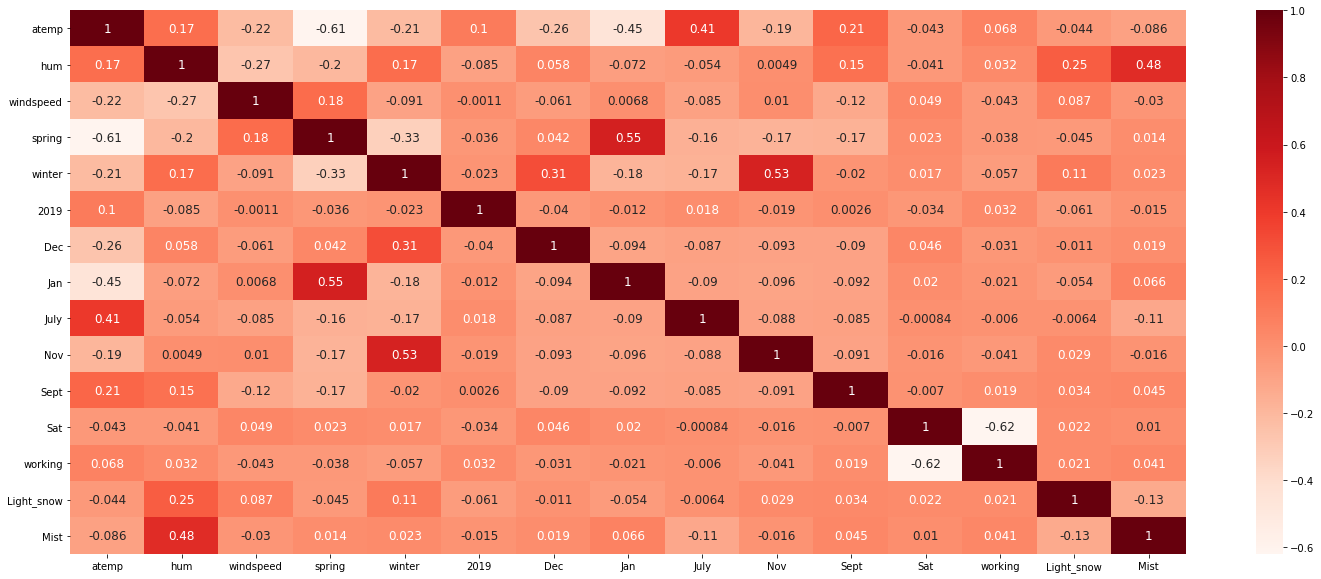

In [49]:
plt.figure(figsize = (25, 10))
sns.heatmap(X.corr(), annot = True, cmap = 'Reds', annot_kws={"size":12})
plt.show()

### Testing model 1

In [50]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

# Making predictions
y_pred = lm.predict(X_test_new)

from sklearn.metrics import r2_score

r2_score(y_true = y_test, y_pred = y_pred) 

0.831135835490699

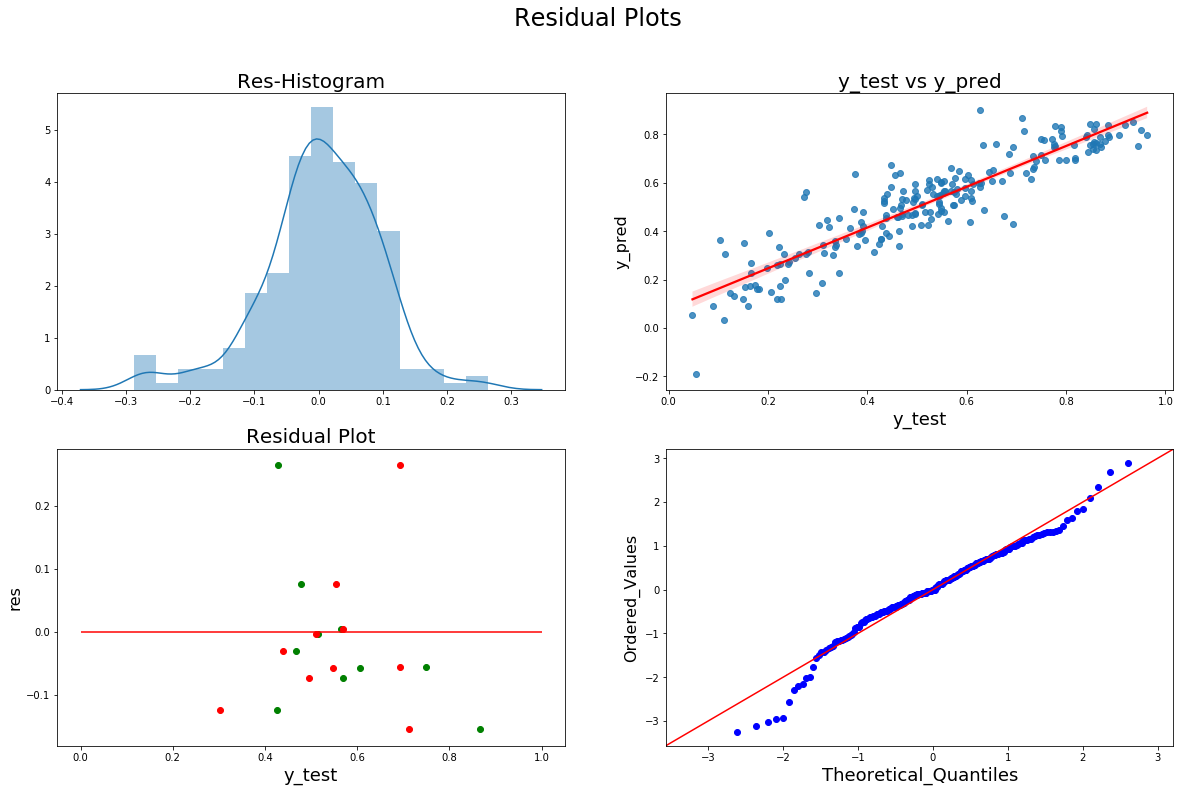

In [51]:
plt.figure(figsize = (20,12))


plt.subplot(2,2,1)
plt.suptitle('Residual Plots', fontsize=24)               # Plot heading 
res = y_test - y_pred
sns.distplot(res)
plt.title('Res-Histogram', fontsize=20)                   # Plot heading 

plt.subplot(2,2,2)
sns.regplot(x = y_test, y = y_pred, line_kws  = {'color': 'red'})
plt.title('y_test vs y_pred', fontsize=20)                # Plot heading 
plt.xlabel('y_test', fontsize=18)                         # X-label
plt.ylabel('y_pred', fontsize=16)                         # Y-label

plt.subplot(2,2,3)
plt.hlines(0, xmin = 0, xmax = 1, color = 'red')
plt.scatter(y_pred[:10], res[:10], c = 'green')
plt.scatter(y_test[:10], res[:10], c = 'red')
plt.title('Residual Plot', fontsize=20)                   # Plot heading 
plt.xlabel('y_test', fontsize=18)                         # X-label
plt.ylabel('res', fontsize=16)                            # Y-label

ax =   plt.subplot(2,2,4)
fig = sm.qqplot(res,  fit=True, line='45', ax = ax)
plt.xlabel('Theoretical_Quantiles', fontsize=18)          # X-label
plt.ylabel('Ordered_Values', fontsize=16)                 # Y-label
plt.show()

## Model 2

### Droppring 'hum' as it is having high VIF=25.75

In [52]:
X_train2 = X_train_1.drop(["hum"], axis = 1)
X_train2.head()

,atemp,windspeed,spring,winter,2019,Dec,Jan,July,Nov,Sept,Sat,working,Light_snow,Mist
653,0.501133,0.329497,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
576,0.766351,0.294871,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
426,0.438975,0.285911,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
728,0.200348,0.676936,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
482,0.391735,0.221789,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [53]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train2 = sm.add_constant(X_train2)

In [54]:
lm = sm.OLS(y_train,X_train2).fit() 

In [55]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     187.7
Date:                Mon, 27 Apr 2020   Prob (F-statistic):          1.25e-187
Time:                        20:48:39   Log-Likelihood:                 508.22
No. Observations:                 510   AIC:                            -986.4
Df Residuals:                     495   BIC:                            -922.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2528      0.027      9.261      0.0

In [56]:
X_train2 = X_train2.drop(['const'], axis=1)

In [57]:
#Calculating the VIF for the new model
vif = pd.DataFrame()
X = X_train2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,atemp,6.89
1,windspeed,4.81
11,working,4.59
3,winter,2.57
2,spring,2.48
4,2019,2.06
10,Sat,1.83
8,Nov,1.78
6,Jan,1.67
13,Mist,1.56


In [58]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

# Making predictions
y_pred = lm.predict(X_test_new)

# from sklearn.metrics import r2_score

r2_score(y_true = y_test, y_pred = y_pred)

0.8215432161133716

### Droping atemp as it is ahving a high VIF value

## Model 3

In [59]:
X_train3 = X_train2.drop(["atemp"], axis = 1)
X_train3.head()

,windspeed,spring,winter,2019,Dec,Jan,July,Nov,Sept,Sat,working,Light_snow,Mist
653,0.329497,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
576,0.294871,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
426,0.285911,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
728,0.676936,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
482,0.221789,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [60]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train3 = sm.add_constant(X_train3)
lm = sm.OLS(y_train,X_train3).fit()

In [61]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     147.4
Date:                Mon, 27 Apr 2020   Prob (F-statistic):          6.61e-161
Time:                        20:48:39   Log-Likelihood:                 441.88
No. Observations:                 510   AIC:                            -855.8
Df Residuals:                     496   BIC:                            -796.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5265      0.017     30.107      0.0

### Finding the VIF

In [62]:
X_train3 = X_train3.drop(['const'], axis = 1)

In [63]:
vif = pd.DataFrame()
X = X_train3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,windspeed,3.96
10,working,3.33
2,winter,2.57
1,spring,2.32
3,2019,1.90
7,Nov,1.76
5,Jan,1.64
9,Sat,1.59
12,Mist,1.54
4,Dec,1.46


### Trsting the model


In [64]:
X_test_new = X_test[X.columns]
X_test_new = sm.add_constant(X_test_new)

y_pred = lm.predict(X_test_new)

r2_score(y_true = y_test, y_pred = y_pred)

0.7776187464211357

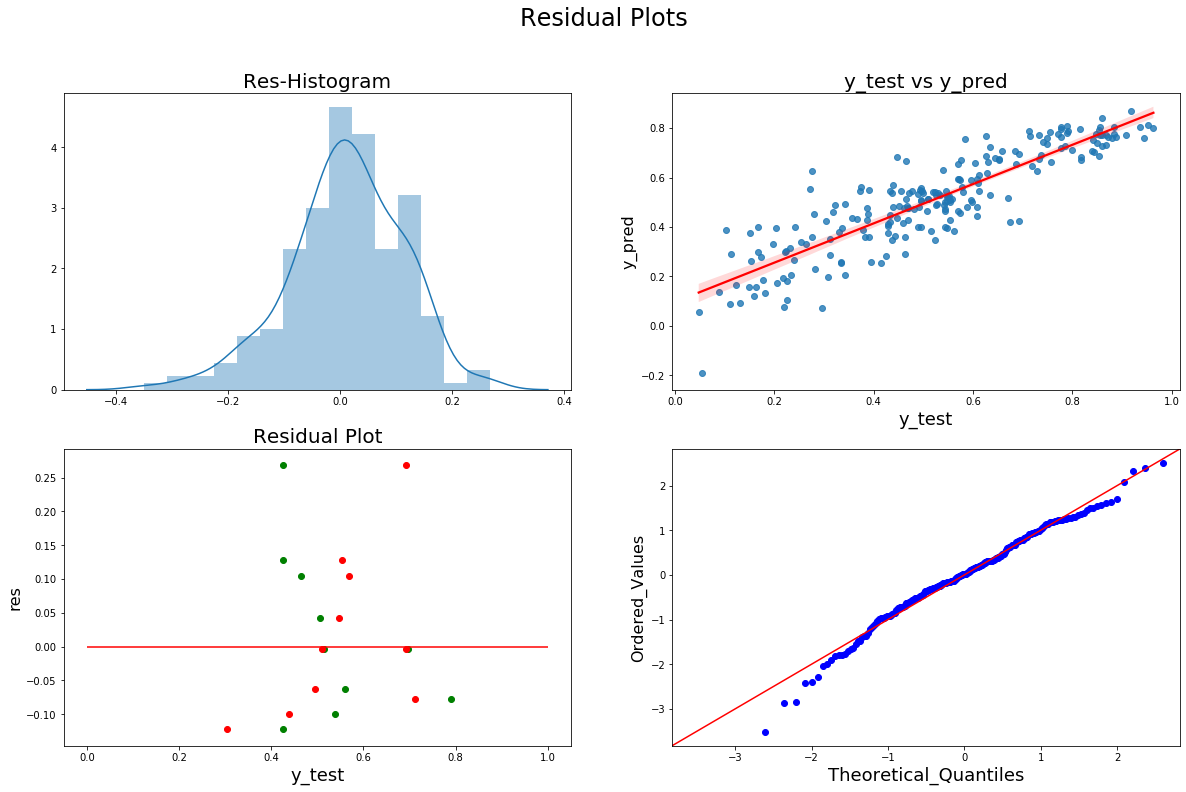

In [65]:
plt.figure(figsize = (20,12))


plt.subplot(2,2,1)
plt.suptitle('Residual Plots', fontsize=24)               # Plot heading 
res = y_test - y_pred
sns.distplot(res)
plt.title('Res-Histogram', fontsize=20)                   # Plot heading 

plt.subplot(2,2,2)
sns.regplot(x = y_test, y = y_pred, line_kws  = {'color': 'red'})
plt.title('y_test vs y_pred', fontsize=20)                # Plot heading 
plt.xlabel('y_test', fontsize=18)                         # X-label
plt.ylabel('y_pred', fontsize=16)                         # Y-label

plt.subplot(2,2,3)
plt.hlines(0, xmin = 0, xmax = 1, color = 'red')
plt.scatter(y_pred[:10], res[:10], c = 'green')
plt.scatter(y_test[:10], res[:10], c = 'red')
plt.title('Residual Plot', fontsize=20)                   # Plot heading 
plt.xlabel('y_test', fontsize=18)                         # X-label
plt.ylabel('res', fontsize=16)                            # Y-label

ax =   plt.subplot(2,2,4)
fig = sm.qqplot(res,  fit=True, line='45', ax = ax)
plt.xlabel('Theoretical_Quantiles', fontsize=18)          # X-label
plt.ylabel('Ordered_Values', fontsize=16)                 # Y-label
plt.show()

In [66]:
### We see a high p-value associated the varuable winter

## Model 4

In [67]:
X_train4 = X_train3.drop(["winter"], axis = 1)
X_train4.head()

,windspeed,spring,2019,Dec,Jan,July,Nov,Sept,Sat,working,Light_snow,Mist
653,0.329497,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
576,0.294871,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
426,0.285911,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
728,0.676936,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
482,0.221789,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [68]:
X_train4 = sm.add_constant(X_train4)

In [69]:
lm = sm.OLS(y_train, X_train4).fit()

In [70]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     159.8
Date:                Mon, 27 Apr 2020   Prob (F-statistic):          6.64e-162
Time:                        20:48:41   Log-Likelihood:                 441.61
No. Observations:                 510   AIC:                            -857.2
Df Residuals:                     497   BIC:                            -802.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5295      0.017     31.199      0.0

In [71]:
X_train4 = X_train4.drop(['const'], axis=1)

In [72]:
vif = pd.DataFrame()
X = X_train4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,windspeed,3.91
9,working,3.29
1,spring,2.12
2,2019,1.89
4,Jan,1.63
8,Sat,1.57
11,Mist,1.53
6,Nov,1.14
7,Sept,1.14
3,Dec,1.13


### Testing the model

In [73]:

# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

# Making predictions
y_pred = lm.predict(X_test_new)

# from sklearn.metrics import r2_score

r2_score(y_true = y_test, y_pred = y_pred)

0.776482945255651

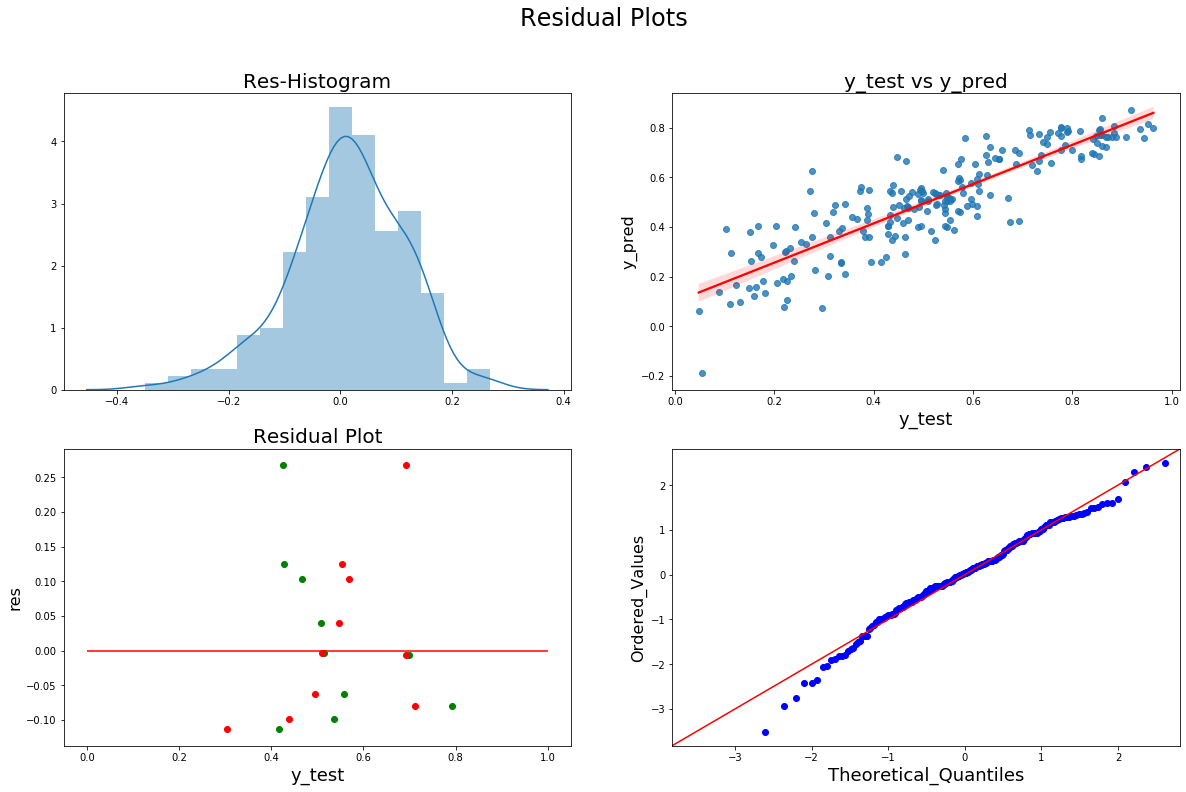

In [74]:
plt.figure(figsize = (20,12))


plt.subplot(2,2,1)
plt.suptitle('Residual Plots', fontsize=24)               # Plot heading 
res = y_test - y_pred
sns.distplot(res)
plt.title('Res-Histogram', fontsize=20)                   # Plot heading 

plt.subplot(2,2,2)
sns.regplot(x = y_test, y = y_pred, line_kws  = {'color': 'red'})
plt.title('y_test vs y_pred', fontsize=20)                # Plot heading 
plt.xlabel('y_test', fontsize=18)                         # X-label
plt.ylabel('y_pred', fontsize=16)                         # Y-label

plt.subplot(2,2,3)
plt.hlines(0, xmin = 0, xmax = 1, color = 'red')
plt.scatter(y_pred[:10], res[:10], c = 'green')
plt.scatter(y_test[:10], res[:10], c = 'red')
plt.title('Residual Plot', fontsize=20)                   # Plot heading 
plt.xlabel('y_test', fontsize=18)                         # X-label
plt.ylabel('res', fontsize=16)                            # Y-label

ax =   plt.subplot(2,2,4)
fig = sm.qqplot(res,  fit=True, line='45', ax = ax)
plt.xlabel('Theoretical_Quantiles', fontsize=18)          # X-label
plt.ylabel('Ordered_Values', fontsize=16)                 # Y-label
plt.show()

### We can see a high p value for July, so droping the column

## Model 5

In [75]:
X_train5 = X_train4.drop(["July"], axis =1)
X_train5.head()

,windspeed,spring,2019,Dec,Jan,Nov,Sept,Sat,working,Light_snow,Mist
653,0.329497,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
576,0.294871,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
426,0.285911,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
728,0.676936,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
482,0.221789,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [76]:
X_train5 = sm.add_constant(X_train5)

In [77]:
lm = sm.OLS(y_train, X_train5).fit()

In [78]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     174.5
Date:                Mon, 27 Apr 2020   Prob (F-statistic):          6.49e-163
Time:                        20:48:43   Log-Likelihood:                 441.33
No. Observations:                 510   AIC:                            -858.7
Df Residuals:                     498   BIC:                            -807.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5324      0.017     32.196      0.0

In [79]:
X_train5 = X_train5.drop(['const'], axis=1)

In [80]:
vif = pd.DataFrame()
X = X_train5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,windspeed,3.90
8,working,3.22
1,spring,2.09
2,2019,1.88
4,Jan,1.63
7,Sat,1.55
10,Mist,1.52
5,Nov,1.13
3,Dec,1.12
6,Sept,1.12


### Testing model 5

In [81]:

# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

# Making predictions
y_pred = lm.predict(X_test_new)

# from sklearn.metrics import r2_score

r2_score(y_true = y_test, y_pred = y_pred)

0.7757592130422841

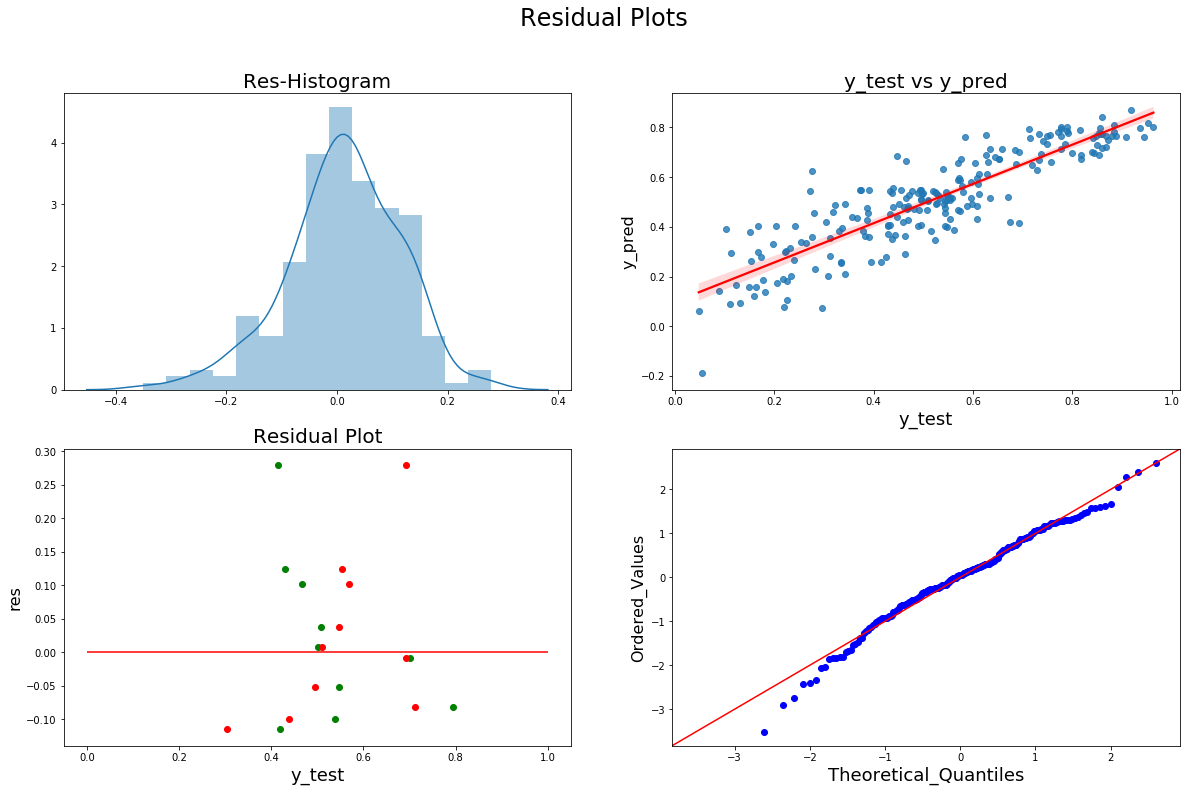

In [82]:
plt.figure(figsize = (20,12))


plt.subplot(2,2,1)
plt.suptitle('Residual Plots', fontsize=24)               # Plot heading 
res = y_test - y_pred
sns.distplot(res)
plt.title('Res-Histogram', fontsize=20)                   # Plot heading 

plt.subplot(2,2,2)
sns.regplot(x = y_test, y = y_pred, line_kws  = {'color': 'red'})
plt.title('y_test vs y_pred', fontsize=20)                # Plot heading 
plt.xlabel('y_test', fontsize=18)                         # X-label
plt.ylabel('y_pred', fontsize=16)                         # Y-label

plt.subplot(2,2,3)
plt.hlines(0, xmin = 0, xmax = 1, color = 'red')
plt.scatter(y_pred[:10], res[:10], c = 'green')
plt.scatter(y_test[:10], res[:10], c = 'red')
plt.title('Residual Plot', fontsize=20)                   # Plot heading 
plt.xlabel('y_test', fontsize=18)                         # X-label
plt.ylabel('res', fontsize=16)                            # Y-label

ax =   plt.subplot(2,2,4)
fig = sm.qqplot(res,  fit=True, line='45', ax = ax)
plt.xlabel('Theoretical_Quantiles', fontsize=18)          # X-label
plt.ylabel('Ordered_Values', fontsize=16)                 # Y-label
plt.show()

## Final model R2 Test = 77.55%

### Max VIF = 3.90

### Number of Variables = 11

## Bases on the model we can say that:

### There is a positive correlation btw the number of bookings and the following:
    1. Year 2019 - More bookings in the Year 2019
    2. September - More bookings in the month of september
    3. Saturday - On Saturdays there are more number of bookings made
    4. Working - there are more bookings made on working days

### There is a negative correlation btw the number of bookings and the following
    1. Windspeed - when the wind speed increases the number of bookings made decreases
    2. Spring - Lesser bookins in Spring season
    3. Dec - Leaser booking for the month of December
    4. Jan - January also lesser bookings
    5. Nov - Nov also less bookings
    6. Light_snow - when light snow starts to happen there are less bokkings
    7. Mist -  In misty conditions there are relatively lesser bookings